## Plot results

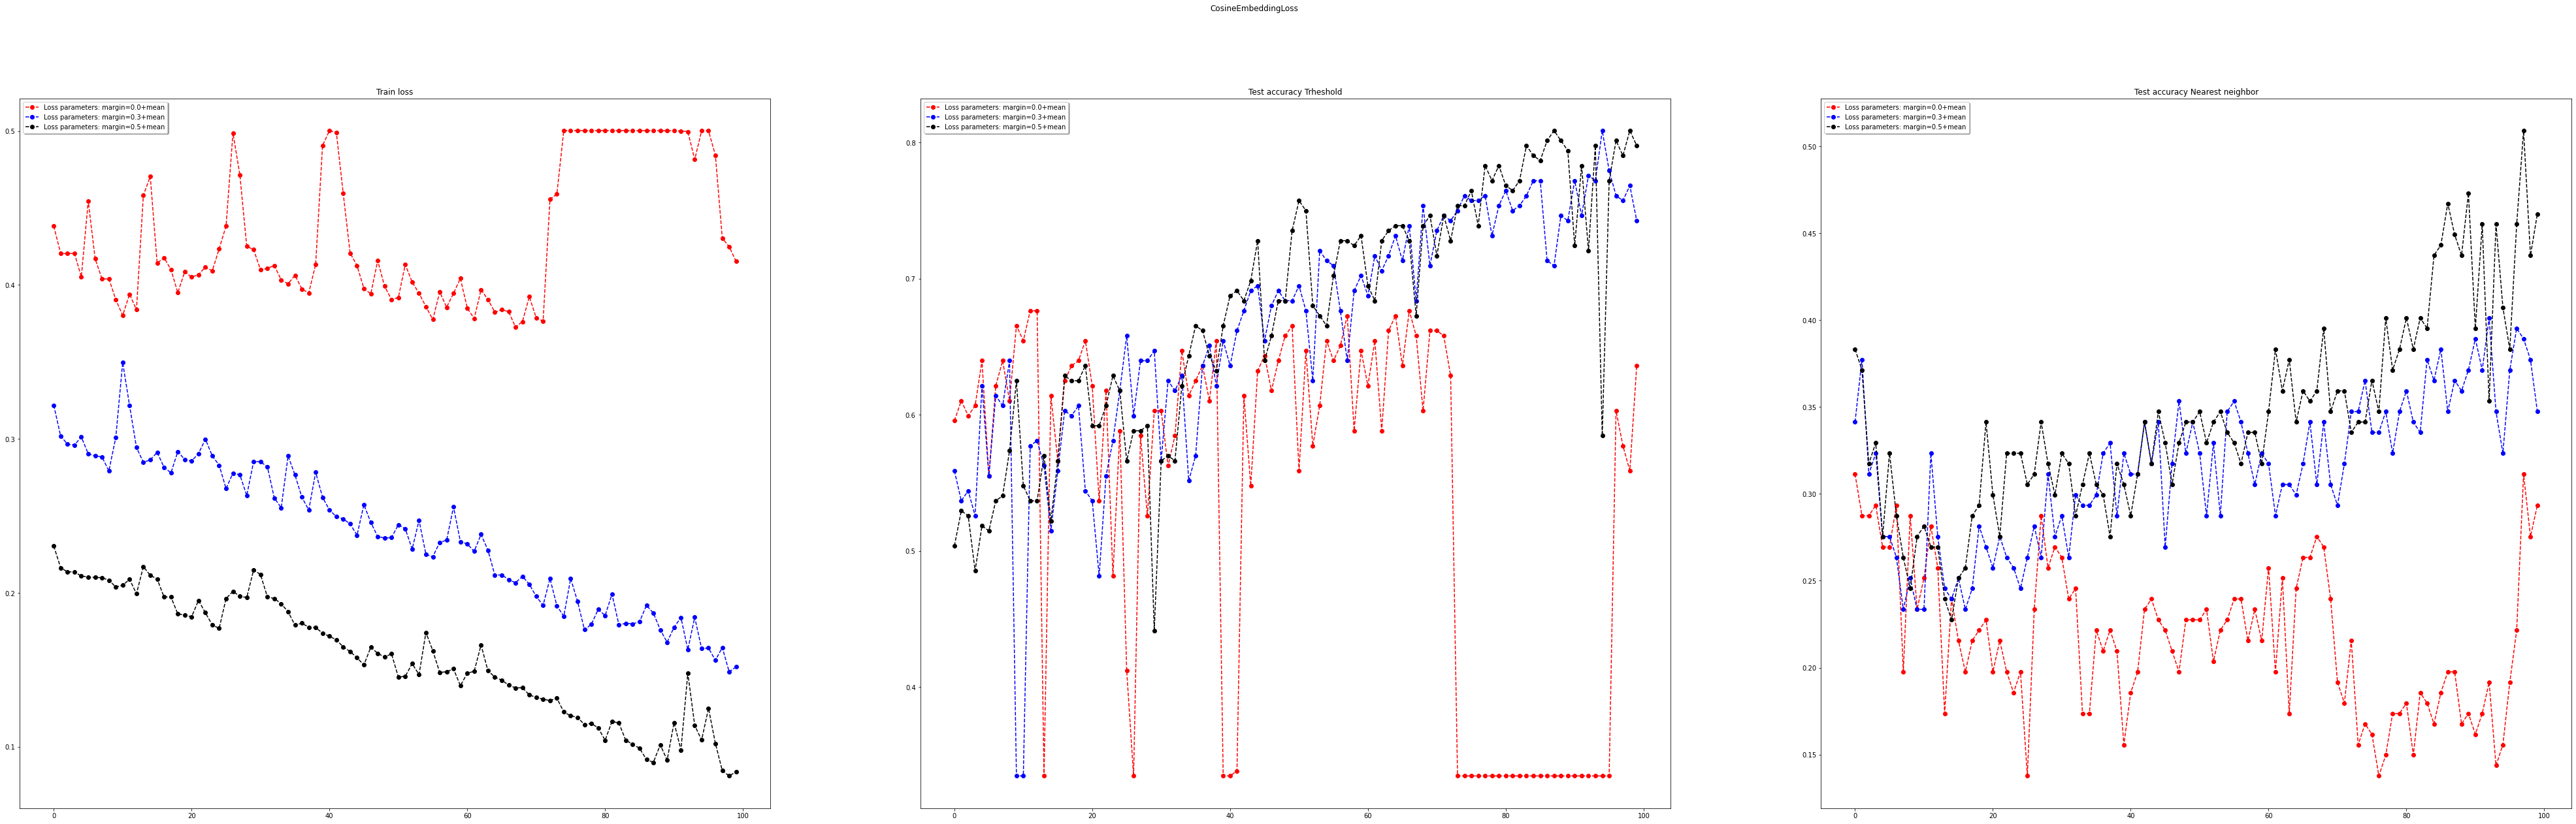

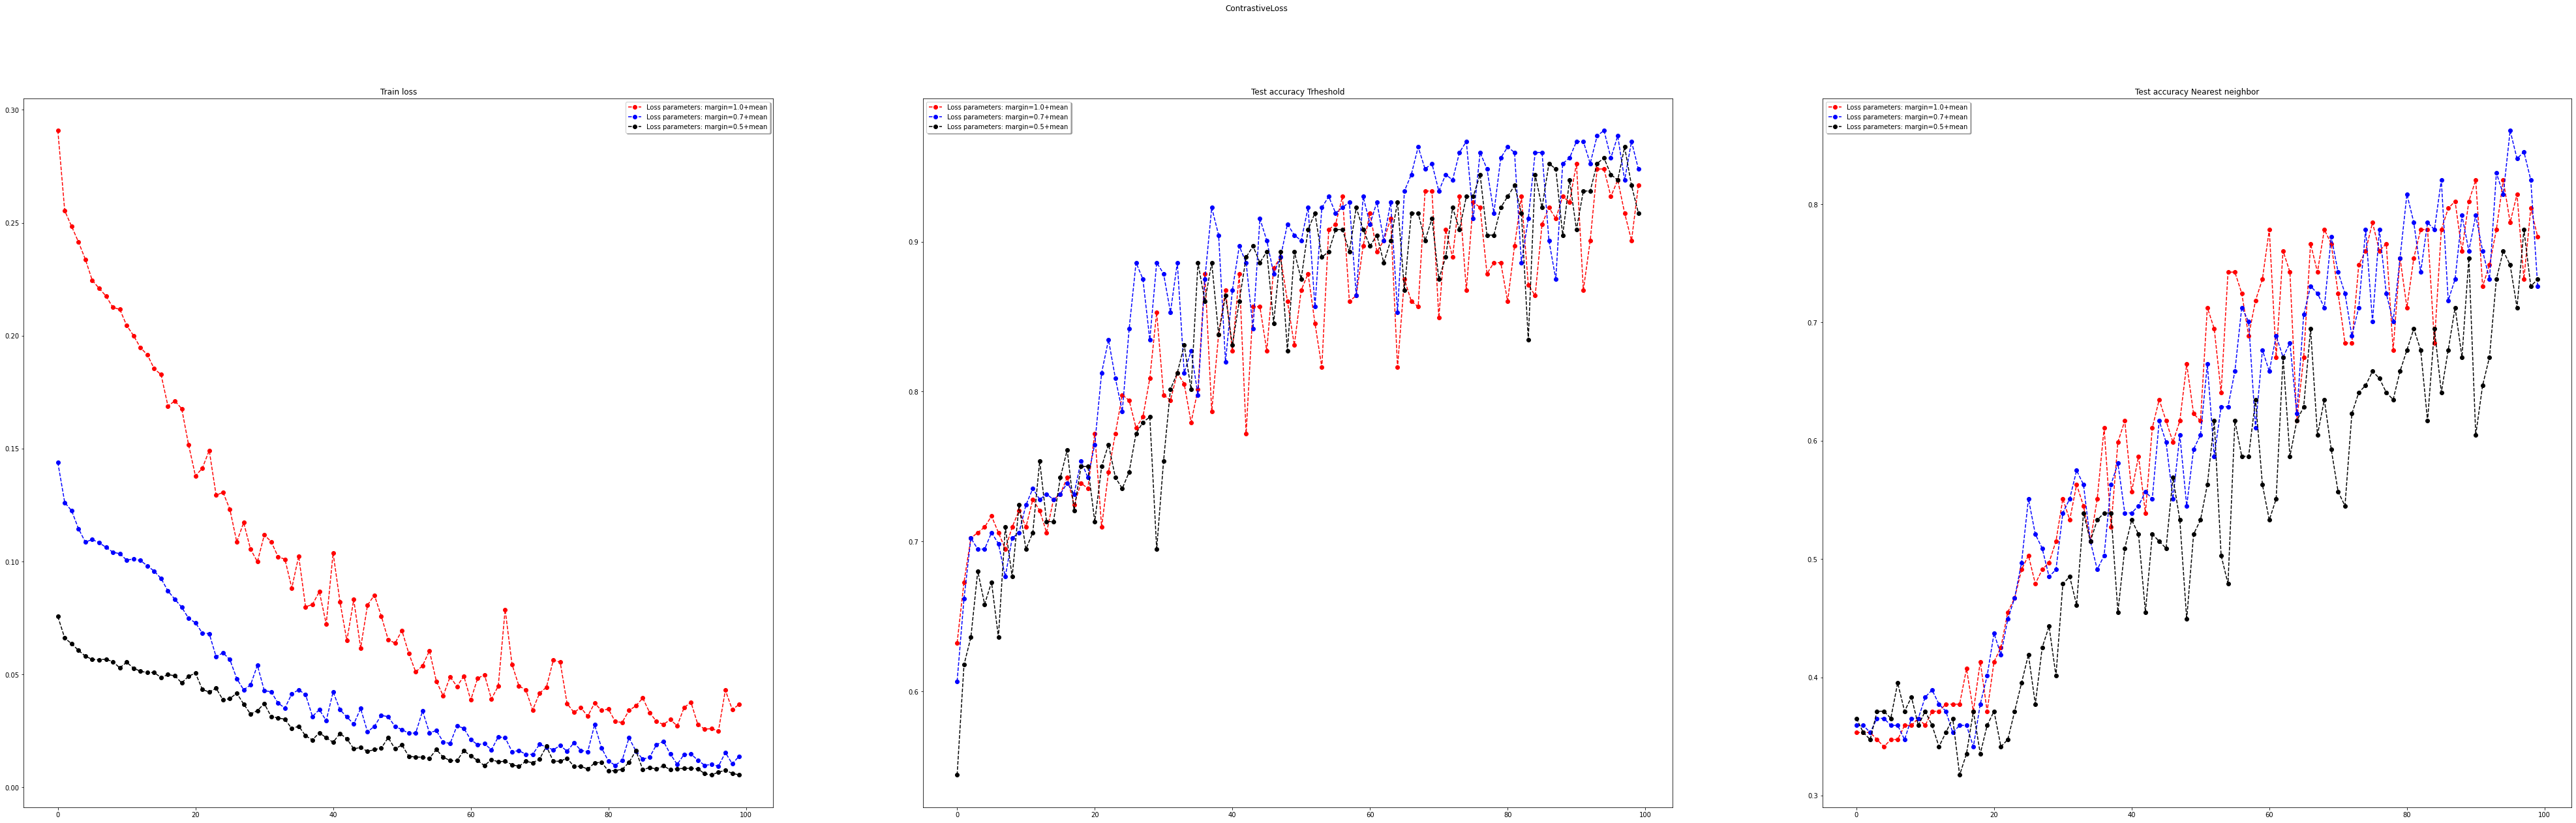

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def reading(file_path):
    s = open(file_path, 'r').read()
    return eval(s)

loss_functions = ["CosineEmbeddingLoss","ContrastiveLoss"]
loss_parameters = ["1.0+mean","0.0+mean","0.7+mean","0.3+mean","0.5+mean"]
colors = ["red","red","blue","blue","black","black"]
for lf in range (len(loss_functions)):
    fig1, axs = plt.subplots(1, 3, figsize=(70, 20), facecolor='w', edgecolor='k')
    for i in range (len(loss_parameters)):
            file_name = "net_name:Fasttext_150|batch_splits:28.0000|lr:0.0010|loss_name:"+loss_functions[lf]+"|loss_parameters:"+loss_parameters[i]
            #{'epoch': 0, 'loss': 0.07563, 'acc': 0.54412, 'acc2': 0.36527, 'time_epoch': 268.2493, 'time_total': 268.2493}    
            try:
                df_results0 = reading("./results/"+file_name+".txt")
            except:
                continue
            loss = list(x["loss"] for x in df_results0)
            acc = list(x["acc"] for x in df_results0)
            acc2 = list(x["acc2"] for x in df_results0)

            fig1.suptitle(loss_functions[lf])
            axs[0].plot(range(0,len(df_results0)), loss, marker="o", c=colors[i],  linestyle='--', label="Loss parameters: margin="+loss_parameters[i])
            axs[1].plot(range(0,len(df_results0)), acc, marker="o", c=colors[i],  linestyle='--', label="Loss parameters: margin="+loss_parameters[i])
            axs[2].plot(range(0,len(df_results0)), acc2, marker="o", c=colors[i],  linestyle='--', label="Loss parameters: margin="+loss_parameters[i])

            axs[0].set_title("Train loss")
            axs[1].set_title("Test accuracy Trheshold")
            axs[2].set_title("Test accuracy Nearest neighbor")

            leg = axs[0].legend(loc='best', ncol=1, shadow=True, fancybox=True)
            leg = axs[1].legend(loc='best', ncol=1, shadow=True, fancybox=True)
            leg = axs[2].legend(loc='best', ncol=1, shadow=True, fancybox=True)
    fig1.savefig("./results/"+loss_functions[lf]+".png",pad_inches = 0)